In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
%matplotlib inline

C:\Users\Sambhaji\AppData\Local\Temp\ipykernel_6740\758408883.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Income,Expense
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.size

1000

In [5]:
df.head()

,CustomerID,Gender,Age,Income,Expense
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Income,Expense
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Expense       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Expense     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Income,Expense
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


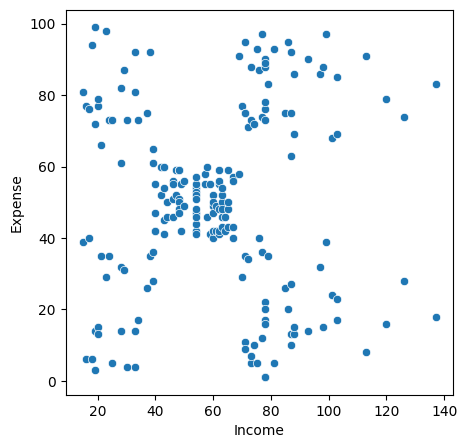

In [13]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Income'], y=df['Expense'])
plt.show()

In [14]:
#Kmeans clustering
from sklearn.cluster import KMeans
ke=KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300,random_state=1)

In [16]:
df=df.drop(['CustomerID','Gender'],axis=1)

In [17]:
df

,Age,Income,Expense
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [19]:
model=KMeans(3)
model.fit(df)
ke.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [20]:
ke.inertia_#wcss within cluster sum of square inertia  #variance within

143342.751571706

In [21]:
cen=ke.cluster_centers_

In [22]:
cen

array([[40.32520325, 44.15447154, 49.82926829],
       [32.69230769, 86.53846154, 82.12820513],
       [40.39473684, 87.        , 18.63157895]])

In [27]:
cen_df=pd.DataFrame(cen,columns=['X','Y','Z'])

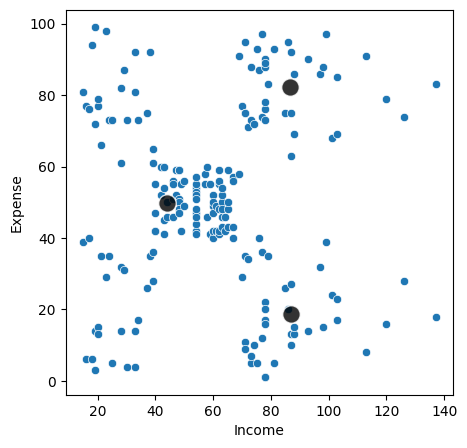

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Income'], y=df['Expense'])
sns.scatterplot(x=cen_df['Y'], y=cen_df['Z'], s=160, alpha=0.8, color='black') 
plt.show()

In [31]:
wcss=[]
for k in range(1,30):
    ke1=KMeans(n_clusters=k,init="k-means++",n_init=10,max_iter=300,random_state=1)
    ke1.fit(df)
    wcss.append(ke1.inertia_)

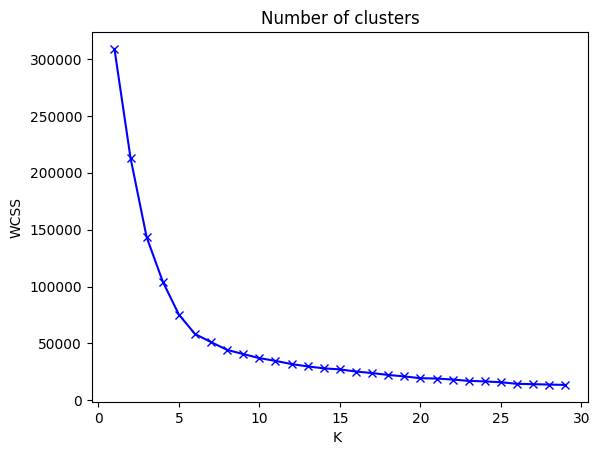

In [32]:
plt.plot(range(1,30),wcss,'bx-')
plt.title('Number of clusters')
plt.xlabel('K ')
plt.ylabel('WCSS')
plt.show()

In [35]:
ke2=KMeans(n_clusters=5,init="k-means++",n_init=10,max_iter=300,random_state=1)

In [36]:
labels=ke2.fit_predict(df)

In [37]:
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [38]:
df_new=pd.concat([df,pd.Series(labels,name='Lables')],axis=1)
df_new

,Age,Income,Expense,Lables
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4
...,...,...,...,...
195,35,120,79,3
196,45,126,28,1
197,32,126,74,3
198,32,137,18,1


In [39]:
ke2.inertia_

75350.77917248776

In [40]:
centroids=ke2.cluster_centers_

In [41]:
centroids

array([[43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513],
       [45.2173913 , 26.30434783, 20.91304348]])

In [42]:
cen_df1=pd.DataFrame(centroids,columns=['X','Y','Z'])

In [43]:
cen_df1

,X,Y,Z
0,43.088608,55.291139,49.569620
1,40.666667,87.750000,17.583333
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


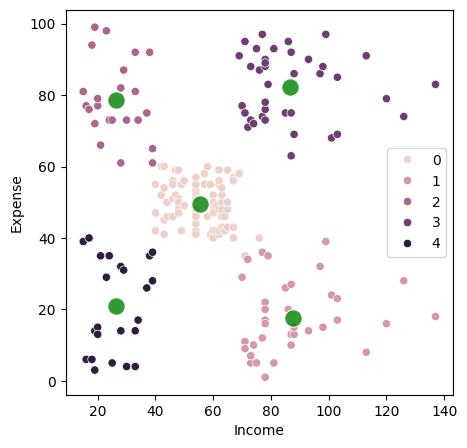

In [45]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_new,x='Income',y='Expense',hue='Lables')
sns.scatterplot(x=cen_df1['Y'],y=cen_df1['Z'],s=160,alpha=0.8,color='green') 
plt.show()

In [46]:
df

,Age,Income,Expense
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [48]:
df_new=pd.concat([df,pd.Series(labels,name='Lables')],axis=1)

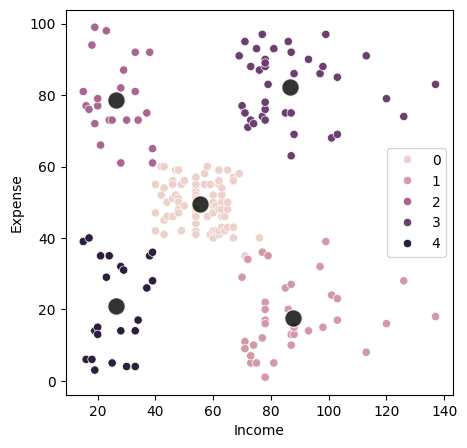

In [49]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_new,x='Income',y='Expense',hue='Lables')
sns.scatterplot(x=cen_df1['Y'],y=cen_df1['Z'],s=160,alpha=0.8,color='black') 
plt.show()

In [50]:
df_new.groupby('Lables').mean()

,Age,Income,Expense
Lables,,,
0,43.088608,55.291139,49.569620
1,40.666667,87.750000,17.583333
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [51]:
from sklearn.preprocessing import StandardScaler
for col in df:
    ss=StandardScaler()
    df[col]=ss.fit_transform(df[[col]])

In [53]:
df_new=pd.concat([df,pd.Series(labels,name='Lables')],axis=1)

In [54]:
df_new

,Age,Income,Expense,Lables
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,4
...,...,...,...,...
195,-0.276302,2.268791,1.118061,3
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,3
198,-0.491602,2.917671,-1.250054,1


In [55]:
#PCA
from sklearn.decomposition import PCA

In [56]:
pc=PCA(n_components=3,random_state=1)

In [60]:
components=pc.fit_transform(df)

In [61]:
df

,Age,Income,Expense
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [62]:
pc1=components[:,0]
pc2=components[:,1]
pc3=components[:,2]

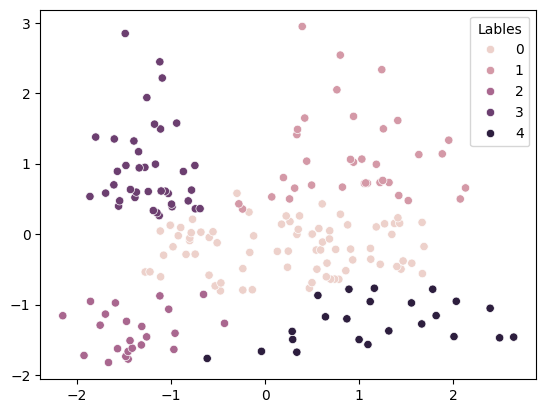

In [63]:
import seaborn as sns
plt.figure()
sns.scatterplot(x=pc1,y=pc2,hue=df_new['Lables'])
plt.show()

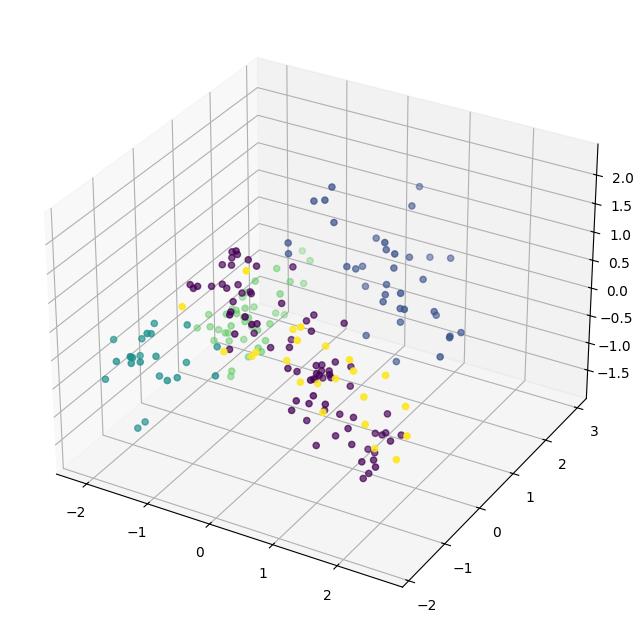

In [64]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.scatter(pc1,pc2,pc3,c=df_new['Lables'])
plt.show()